**Clinical Heart Failure Detection Using Whole-Slide Images of H&E tissue**

**Aim of the Project**

Automated detection of clinical heart failure from Whole-Slide Images of H&E tissue using a Convolutional Neural Network. Determine whether the given histopathology patch image (250x250x3) is normal or has a heart failure (binary classification).

**Background**

This project (till Version 0.19) was done as a Capstone Project as part of 'Advanced Program in Digital Health and Imaging - Cohort1 - Aug'20 to Jan'21' from Indian Institute of Science (IISc), Bengaluru.
- Project Contributors: **Chinmoy Raj Hota** and **Ashwin Kumar**
- Project Mentor: **Dr. Phaneendra Yalavarthy, Associate Professor, Computational Data Science Dept.(CDS), IISc, Bengaluru**
- Supported by: **Naveen Paluru, PhD Scholar at CDS, IISc**

We express our sincere gratitude to the Dr. Phaneendra and Naveen for the guidance and support in completing the project. We are very thankful to the Cohort1 Group Members for the class interactions which enhanced our knowledge. We also would like to thank the creators/authors of the information mentioned in the References section which helped us a lot in the project development.

Post course completion, Chinmoy continued on further work beyond Version 0.19. 

**Capstone Project Summary (till Version 0.19)**

**Methods that have been deployed**

- Transfer Learning with ResNet50
- Transfer Learning and Fine Tuning with MobileNet V1

**Computing Resources Utilized**

- Pre-trained ResNet50 and MobileNet V1
- Google Colab GPU

**Dataset Details**

- Location: https://idr.openmicroscopy.org/webclient/?show=project-402
- Breakup of training/test instances: Training = 770# , Validation = 374#, Test = 1155#


**Details of Model**

- Pre-trained ResNet50 + Custom FCN Layer
- Pre-trained MobileNet V1 + Custom FCN Layer
- Hidden Units in FCN after Conv: 512 Neurons, Dropout = 0.4
- Loss Function = Cross Entropy.  
- Optimizer = Adam, Learning Rate = 0.01
- Epoch = 100, Batchsize = 10
- Cross Validation(CV): Stratified K Fold, 4 Folds

**Summary**

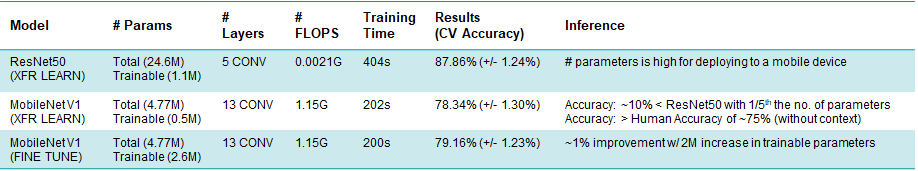

**Inferences**

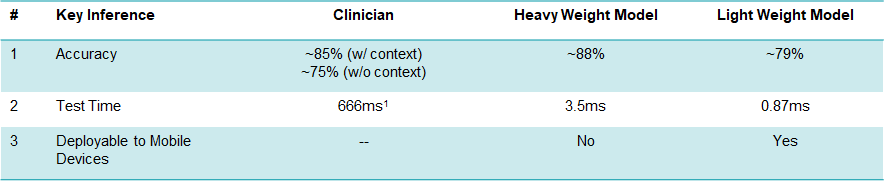

Reference(1) : https://www.nature.com/articles/s41598-020-58467-9

**Other Inferences**

- The H&E images have a high variety of information in them. Hence, although being a binary classification problem, a DL solution proves to be a best bet.    
- Batch Normalization, Regularization and Data Augmentation did not help improve the accuracy as the binary classes are balanced. 
- There is site to site process variability in Whole Slide Image Capture. Hence, the model might need site level customization to be more effective. This might require model to get trained on lesser data. 


**Summary (Post Course Completion / Post Version 0.19)**

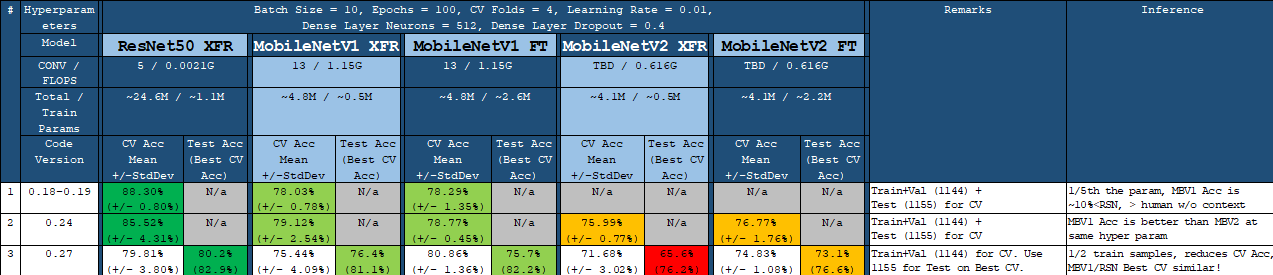


**Download Train, Validate and Test Images**

- Source Link to the Dataset / Annotation File: https://idr.openmicroscopy.org/webclient/?show=project-402
- Follow the instructions at following link, install IBM Aspera Desktop Client to download the dataset.
- Copy downloaded folders to '**data/images**' folder in your working directory where you have this Jupyter Notebook:
  - 'held-out_validation'
  - 'training'

**Download Label Information for Train, Validate and Test Images** 

- Following link will point to below Github link which has the annotation File: https://idr.openmicroscopy.org/webclient/?show=project-402
- Source Link for the Annotation File: https://github.com/IDR/idr0042-nirschl-wsideeplearning/tree/master/experimentA
- Download and copy file '**idr0042-experimentA-annotation.csv**' to '**data/labels/**' folder in your working directory where you have this Jupyter Notebook

**Understand Images Folder Structure and Number of Images Available**

Training/Validation
- \..\training\fold_1: has images for training = 770#
- \..\training\test_fold_1: has images for validation = 374#
- Total = 770 + 374 = 1144 images

Test
- \..\held-out_validation: has images for testing = 1155#

**Understand Annotation File and Label Information Available**

Relevant columns of interest:
- Column A: Dataset Name: Classifies each row/instance as 'training' or 'test'
- Column B: Image Name: Specifies filename of the image for the row/instance
- Column Z: Experimental Condition [Diagnosis]: has 3 classes:
  - 'chronic heart failure'
  - 'heart tissue pathology' - We will treat this as 'not chronic heart failure'
  - 'not chronic heart failure'
- Column AA: Channels: mentions RGB => images are color images and will have 3 channels Red/Green/Blue (for CNN). 
  
Breakup of training/test instances:
- training
  - 'chronic heart failure' = 517
  - 'not chronic heart failure' = 627
- test
  - 'chronic heart failure' = 517
  - 'not chronic heart failure' = 638

Total 'training' = 517 + 627 = 1144  (Note: 'validate' is a portion of this 'training' set.)

Total 'test' = 517 + 638 = 1155

**Load Common Libraries**

In [1]:
# install OpenCV package - this is required only once
# pip install opencv-python

In [2]:
# aids in reading image files
import cv2
import glob
# aids in working with arrays
import numpy as np
# aids in working with dataframes
import pandas as pd
# aids in calculation of time
import time
# aids in converting the labels to categorical
from keras.utils import to_categorical

In [3]:
pip install keras-flops

In [4]:
# aids in calculation of flops of the model
from keras_flops import get_flops

**Mount Google Drive**

We need to mount the google drive so that we can then access the files from google drive.

In [1]:
# run this. click on the link it will ask for. get the authentication code. Copy/Paste in the cell. Hit Enter.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Get labels info into a dataframe**

We need to import the annotation file into a dataframe so that we can then access the labels information.

In [6]:
# Google Drive / Colab
filepath_annotation_file = r'/content/gdrive/MyDrive/Colab Notebooks/Clinical Heart Failure using H&E Images /data/labels/idr0042-experimentA-annotation.csv'
labels = pd.read_csv(filepath_annotation_file)

# Local Drive / Jupyter
# labels = pd.read_csv('data/labels/idr0042-experimentA-annotation.csv')

In [7]:
### for understanding purposes ###
print(labels)
print(type(labels))
print(labels['Dataset Name'])
print(labels['Dataset Name'][0])
type(labels['Dataset Name'][0])
print(labels['Image Name'])
print(labels['Image Name'][0])
type(labels['Image Name'][0])
print(labels['Experimental Condition [Diagnosis]'])
print(labels['Experimental Condition [Diagnosis]'][0])
type(labels['Experimental Condition [Diagnosis]'][0])
# confirm 'no info' cells have been encoded as 'nan'... check one entry
print(labels['Characteristics [Disease Subtype]'][463])
### for understanding purposes ###

     Dataset Name  ... Channels
0        training  ...      RGB
1        training  ...      RGB
2        training  ...      RGB
3        training  ...      RGB
4        training  ...      RGB
...           ...  ...      ...
2294         test  ...      RGB
2295         test  ...      RGB
2296         test  ...      RGB
2297         test  ...      RGB
2298         test  ...      RGB

[2299 rows x 27 columns]
<class 'pandas.core.frame.DataFrame'>
0       training
1       training
2       training
3       training
4       training
          ...   
2294        test
2295        test
2296        test
2297        test
2298        test
Name: Dataset Name, Length: 2299, dtype: object
training
0       33381_0_fal_10_0.png
1       33381_0_fal_14_0.png
2       33381_0_fal_16_0.png
3       33381_0_fal_18_0.png
4       33381_0_fal_25_0.png
                ...         
2294    36175_1_nrm_18_0.png
2295     36175_1_nrm_1_0.png
2296    36175_1_nrm_20_0.png
2297    36175_1_nrm_21_0.png
2298     36175_1_n

**Function to prepare images and labels for CNN based Model**

We need to read 'train, validate and test images' to arrays so that we can then use them to feed to our CNN model. We need to prepare the labels to match to CNN model's expectation. All the images are of type '*.png'. We will read filepath for all "filenames with extension as 'png'" into a list. Here, filepath means 'relative directory + filename'. We will extract filename of the image from the file path. This filename can then be used to get the label information from the annotation file.

In [8]:
### for understanding purposes ###
# This is useful for Local Drive / Jupyter. This scenario has '\\' between the directory and filename. 
# We can split the string to get directory and filename separately
# directory, filename = filepathlist_train[0].split('\\')
# print(directory)
# print(filename)
### for understanding purposes ###

In [9]:
### for understanding purposes ###
# Google Drive / Colab
filepathlist_train = glob.glob('/content/gdrive/MyDrive/Colab Notebooks/Clinical Heart Failure using H&E Images /data/images/training/fold_1/*.png')
# confirm you have got the total number of desired items in the list
print(len(filepathlist_train))
# check what an element in the filelist contain.
# it has both directory information and the filename, we need to extract filename 
# the filename can then be used to check for the label info in the labels dataframe
print(filepathlist_train[0])
print(len(filepathlist_train[0]))
print(filepathlist_train[0][-19:])
print(filepathlist_train[0][len(filepathlist_train[0]) - 1])
print(filepathlist_train[0][-1])
### for understanding purposes ###

770
/content/gdrive/MyDrive/Colab Notebooks/Clinical Heart Failure using H&E Images /data/images/training/fold_1/33392_0_fal_4_0.png
128
33392_0_fal_4_0.png
g
g


In [10]:
### for understanding purposes ###
# POC to get filename for a given filepath
idx = -1
while (filepathlist_train[0][idx] != '/'):
  idx = idx - 1 
# index currently points to '/' location, we need to start reading from next location to get file name
print(idx)
filename = filepathlist_train[0][idx + 1:]
print(filename)
### for understanding purposes ###

-20
33392_0_fal_4_0.png


In [11]:
### for understanding purposes ###
# POC to iterate over multiple filepaths
index_filepathlist = 0
for filepath in filepathlist_train:
    #print(index_filepathlist, filepath)
    index_filepathlist += 1
### for understanding purposes ###

In [12]:
### for understanding purposes ###
# read a file using the list containing the file path
img = cv2.imread(filepathlist_train[0])
### for understanding purposes ###

In [13]:
# function to count ones and zeroes in the label array
def print_ones_zeroes (labels):
  count_ones = 0
  count_zeroes = 0
  for i in range(len(labels)):
    if (labels[i] == 1):
      count_ones += 1
    elif (labels[i] == 0):
      count_zeroes += 1
  print('Total Labels:',(count_ones + count_zeroes))
  print('# of Class 1:',count_ones)   
  print('# of Class 0:',count_zeroes)

In [14]:
# function to prepare images & labels for the model
def prepare_images_labels (path_to_img_files, labels_dataframe, resize = True):
  start_time = time.time()
  filepathlist = glob.glob(path_to_img_files)
  # define the empty list that need to populated with info
  images = []
  labels = []
  index_filepathlist = 0
  # iterate for all items in the file path list
  for filepath in filepathlist:
      # prepare image list
      img = cv2.imread(filepath)
      if (resize == True):
        dim = (224,224)
        img = cv2.resize(img, dim)#, interpolation = inter)
      images.append(img)
      # prepare labels list
      # extract filename from the file path
      # Local Drive / Jupyter
      # directory, filename = filepath.split('\\')
      # Google Drive / Colab
      index_character = -1
      while (filepathlist[index_filepathlist][index_character] != '/'):
        index_character = index_character - 1 
      # character index currently points to '/' location, we need to start reading from next location to get file name
      filename = filepathlist[index_filepathlist][index_character + 1:]
      index_filepathlist += 1
      # iterate for all items in our labels dataframe to search for the label
      for index in range(len(labels_dataframe)):
          # we will compare the filename with all the filenames in the 'Image Name' column of the labels dataframe
          # when there is a match, we will copy the label from the 'Experimental Condition [Diagnosis]' column
          if (filename == labels_dataframe['Image Name'][index]):
              label = labels_dataframe['Experimental Condition [Diagnosis]'][index]
              # encode Class1 and Class0 as applicable
              if (label == 'chronic heart failure'):
                  label = 1
              elif (label == 'not chronic heart failure'):
                  label = 0
              elif (label == 'heart tissue pathology'):
                  label = 0
              # append the label to the list
              labels.append(label)
  # convert list to a numpy array and the values to float
  images = np.array(images, dtype = 'float32')
  # check the shape to confirm it is ready for CNN
  # number of instances, width, height, number of channels
  # number of instances = number of image
  # number of channels = 3 ... as these are color images
  print('Shape of Images:',images.shape)
  # convert list to a numpy array and the values to int64
  labels = np.array(labels, dtype = 'int64')
  # check the shape to confirm it is ready for CNN
  print('Shape of Labels:', labels.shape)
  print_ones_zeroes(labels)
  duration = time.time() - start_time 
  print(f'Images/Labels Prep Core Time = {duration}s')
  return images, labels

**Prepare Train Images and Train Labels**

In [15]:
# read filepath for all "filenames with extension as 'png'" into a list
# here filepath means 'relative directory + filename'
# Google Drive / Colab
path_to_img_files = '/content/gdrive/MyDrive/Colab Notebooks/Clinical Heart Failure using H&E Images /data/images/training/fold_1/*.png'
# Local Drive / Jupyter
# filepathlist_train = glob.glob('data/images/training/fold_1/*.png')
train_images, train_labels = prepare_images_labels (path_to_img_files, labels, True) # resize set to True to resize images to 224 x 224
# save the labels before converting to categorical to use for cross validation splits
train_labels_before_categorical = train_labels
print('train_labels_before_categorical:', type(train_labels_before_categorical), len(train_labels_before_categorical), train_labels_before_categorical.shape)
# convert labels to categorical
train_labels = to_categorical(train_labels)

Shape of Images: (770, 224, 224, 3)
Shape of Labels: (770,)
Total Labels: 770
# of Class 1: 352
# of Class 0: 418
Images/Labels Prep Core Time = 12.189587116241455s
train_labels_before_categorical: <class 'numpy.ndarray'> 770 (770,)


**Prepare Validation Images and Validation Labels**

In [16]:
# read filepath for all "filenames with extension as 'png'" into a list
# here filepath means 'relative directory + filename'
# Google Drive / Colab
path_to_img_files = '/content/gdrive/MyDrive/Colab Notebooks/Clinical Heart Failure using H&E Images /data/images/training/test_fold_1/*.png'
# Local Drive / Jupyter
# filepathlist_validation = glob.glob('data/images/training/test_fold_1/*.png')
validation_images, validation_labels = prepare_images_labels (path_to_img_files, labels, True) # resize set to True to resize images to 224 x 224
# save the labels before converting to categorical to use for cross validation splits
validation_labels_before_categorical = validation_labels
print('validation_labels_before_categorical:', type(validation_labels_before_categorical), len(validation_labels_before_categorical), validation_labels_before_categorical.shape)
# convert labels to categorical
validation_labels = to_categorical(validation_labels)

Shape of Images: (374, 224, 224, 3)
Shape of Labels: (374,)
Total Labels: 374
# of Class 1: 165
# of Class 0: 209
Images/Labels Prep Core Time = 5.967990159988403s
validation_labels_before_categorical: <class 'numpy.ndarray'> 374 (374,)


**Prepare Test Images and Test Labels**

In [17]:
# read filepath for all "filenames with extension as 'png'" into a list
# here filepath means 'relative directory + filename'
# Google Drive / Colab
path_to_img_files = '/content/gdrive/MyDrive/Colab Notebooks/Clinical Heart Failure using H&E Images /data/images/held-out_validation/*.png'
# Local Drive / Jupyter
# filepathlist_test = glob.glob('data/images/held-out_validation/*.png')
test_images, test_labels = prepare_images_labels (path_to_img_files, labels, True) # resize set to True to resize images to 224 x 224
# save the labels before converting to categorical to use for cross validation splits
test_labels_before_categorical = test_labels
print('test_labels_before_categorical:', type(test_labels_before_categorical), len(test_labels_before_categorical), test_labels_before_categorical.shape)
# convert labels to categorical
test_labels = to_categorical(test_labels)

Shape of Images: (1155, 224, 224, 3)
Shape of Labels: (1155,)
Total Labels: 1155
# of Class 1: 517
# of Class 0: 638
Images/Labels Prep Core Time = 18.08893871307373s
test_labels_before_categorical: <class 'numpy.ndarray'> 1155 (1155,)


**Prepare All Images and Labels for Cross Validation**

In [18]:
# confirm all are numpy arrays, length and shape
print('train_images:', type(train_images), len(train_images), train_images.shape)
print('validation_images:', type(validation_images), len(validation_images), validation_images.shape)
#print('test_images:', type(test_images), len(test_images), test_images.shape)
print('Total Images:', len(train_images) + len(validation_images))# + len(test_images))
print('train_labels:', type(train_labels), len(train_labels), train_labels.shape)
print('validation_labels:', type(validation_labels), len(validation_labels), validation_labels.shape)
#print('test_labels:', type(test_labels), len(test_labels), test_labels.shape)
print('Total Labels:', len(train_labels) + len(validation_labels))# + len(test_labels))
# join train / validation / test arrays for images
all_images = np.concatenate((train_images, validation_images))#, test_images))
print('all_images:', type(all_images), len(all_images), all_images.shape)
# join train / validation / test arrays for labels
all_labels = np.concatenate((train_labels, validation_labels))#, test_labels))
print('all_labels:', type(all_labels), len(all_labels), all_labels.shape)
# prepare the labels to enable split during k-cross validation
all_labels_before_categorical = np.concatenate((train_labels_before_categorical, validation_labels_before_categorical))#, test_labels_before_categorical))
print('all_labels_before_categorical;', type(all_labels_before_categorical), len(all_labels_before_categorical), all_labels_before_categorical.shape)

train_images: <class 'numpy.ndarray'> 770 (770, 224, 224, 3)
validation_images: <class 'numpy.ndarray'> 374 (374, 224, 224, 3)
Total Images: 1144
train_labels: <class 'numpy.ndarray'> 770 (770, 2)
validation_labels: <class 'numpy.ndarray'> 374 (374, 2)
Total Labels: 1144
all_images: <class 'numpy.ndarray'> 1144 (1144, 224, 224, 3)
all_labels: <class 'numpy.ndarray'> 1144 (1144, 2)
all_labels_before_categorical; <class 'numpy.ndarray'> 1144 (1144,)


**Define Common Hyperparameters**

In [19]:
# 1 epoch = 770 / 10 = 77 batches
BATCH_SIZE = 10  
# 1 epoch = 1 complete run of all train samples for training the model
EPOCHS = 100 
LEARNING_RATE = 0.01
DENSE_LAYER_NEURONS = 512
DENSE_LAYER_DROPOUT = 0.4
CROSS_VALIDATE = True
CROSS_VALIDATION_FOLDS = 4 
TOTAL_TEST_SAMPLES = 1155

# MobileNetV1
# set trainable layers starting from 80th layer
# 0 to 72 = Till Conv11 ; # 73 to 79 - Conv12; # 80 to 85 = Conv13 ; # 86 to 91 = Post Conv13 before Custom (GAP...) ; # 92 to 94 = Custom (Dense/Dropout/Dense(2))
MOBILENETV1_TRAINABLE_START_LAYER = 80
# MobileNetV2
MOBILENETV2_TRAINABLE_START_LAYER = 151

**Function to check values during training**

In [20]:
from keras.callbacks import ModelCheckpoint
def checkpoint(path_to_model_parameters_file):
  # path_to_model_parameters_file: file to which the weights need to be saved
  # monitor: defines the quantity to monitor ... we will monitor validation accuracy
  # verbose: verbose yes/no
  # save_best_only: true then save weghts else save entire model
  # mode: max if val_acc, min if val_loss, auto decides based on the quantity getting monitored
  # save_freq: save_freq:  specify the frequency in number of batches seen
  # period:  check after every epoch therefore 1
  checkpoint_value = ModelCheckpoint(path_to_model_parameters_file, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_freq = 'epoch') #period=1
  return checkpoint_value

**Define function to train and validate the model**

In [21]:
# trains and validates model ... returns trained model, saves the best parameters file in the location provided
def train_and_validate_model(model_name, trn_imgs, trn_lbls, val_imgs, val_lbls, path_to_model_params_file):
  print('Model Train and Validation: Starting')
  start_time = time.time()
  model_name.fit(trn_imgs, trn_lbls, epochs = EPOCHS, batch_size = BATCH_SIZE, validation_data = (val_imgs, val_lbls), 
                 callbacks=[checkpoint(path_to_model_params_file)])
  duration = time.time() - start_time
  print(f'Train and Validation Time = {duration}s')
  print('Model Train and Validation: Completed')
  return model_name

**Define function to test model with best parameters**

In [22]:
# test with best model (params from best epoch)
def test_model_with_best_params(model_name, path_to_best_params_file, test_imgs, test_lbls):
  print('Model Test: Starting')
  model_name.load_weights(path_to_best_params_file)
  start_time = time.time()
  test_loss, test_acc = model_name.evaluate(test_imgs, test_lbls)
  duration = time.time() - start_time
  print(f'Test Time = {duration}s')
  print(f'Test Time / sample = {duration/TOTAL_TEST_SAMPLES}s')
  print('Model Test: Completed')
  return model_name

**Define function to set the trainable layers for the model**

In [23]:
def set_trainable_layers_starting_from(model_name, trainable_start_layer_number):
  ############################################################################################################################################################################
  # CONFIGURE LAYERS FOR TRAINING #
  print(f'Layers Configuration: Starting')
  for layer in model_name.layers[:trainable_start_layer_number]: 
      layer.trainable=False
  for layer in model_name.layers[trainable_start_layer_number:]: 
      layer.trainable=True
  print(f'Layers Configuration: Completed')
  return model_name
  ############################################################################################################################################################################

**Define function to cross validate model**

In [24]:
# cross validate the model and get the path to the file containing best cross validation fold's parameters
def cross_validate_model(model_name, all_imgs, all_lbls, all_lbls_before_categorical, path_to_bestxfr_params_file = 'NULL'):
  ###############################################################################################################################################################################
  # MODEL CROSS VALIDATION #
  print('Model Cross Validation: Starting')
  # perform cross validation
  start_time = time.time()
  # import libraries
  from sklearn.model_selection import StratifiedKFold
  # using stratifiedkfold so that we have balanced classes in each split
  cvfold = StratifiedKFold(n_splits = CROSS_VALIDATION_FOLDS, shuffle = True)
  # we will use below to store all individual validation scores
  cvscores = []
  # initialize variables for the accuracy analysis for various folds  
  fold = 0
  # based on the class value, get the split done and respective train and test index
  for train_index, val_index in cvfold.split(all_imgs, all_lbls_before_categorical):
    if (model_name == 'resnet50xfr'):
      model = define_model_resnet50xfr()
    elif (model_name == 'mobilenetv1xfr'):
      model = define_model_mobilenet('V1')
    elif (model_name == 'mobilenetv1ft'):
      model = define_model_mobilenet('V1')
      set_trainable_layers_starting_from(model, MOBILENETV1_TRAINABLE_START_LAYER)
      model.load_weights(path_to_bestxfr_params_file) 
    elif (model_name == 'mobilenetv2xfr'):
      model = define_model_mobilenet('V2') 
    elif (model_name == 'mobilenetv2ft'):
      model = define_model_mobilenet('V2')
      set_trainable_layers_starting_from(model, MOBILENETV2_TRAINABLE_START_LAYER)
      model.load_weights(path_to_bestxfr_params_file)    
    # train based on train index elements
    #path_to_model_cv_params_file = '/content/gdrive/MyDrive/Colab Notebooks/Clinical Heart Failure using H&E Images/best_cv.hdf5'
    path_to_model_cv_params_file = f'/content/gdrive/MyDrive/Colab Notebooks/Clinical Heart Failure using H&E Images/best_{model_name}_cvfold_{fold}.hdf5'
    hist = model.fit(all_imgs[train_index], all_lbls[train_index], epochs = EPOCHS, batch_size = BATCH_SIZE, verbose = 1, 
                     validation_data = (all_imgs[val_index], all_lbls[val_index]), callbacks=[checkpoint(path_to_model_cv_params_file)])
    # get the validation accuracy
    # hist.history['val_accuracy'] is a list ... hence, get the float value using index 0 of the list
    cv_score = hist.history['val_accuracy'][0]
    print("Cross Validation Accuracy: %0.2f%%" % (cv_score*100))
    # append each iteration validation accuracy score
    cvscores.append(cv_score*100)
    # print fold number and increment
    print(f'Fold #{fold} Complete \n')
    fold += 1
  # print mean and std deviation of the validation accuracy for the complete cross validation i.e. for all iterations
  print("Cross Validation Accuracy Mean (+/- Std Deviation): %0.2f%% (+/- %0.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
  # determine best fold
  best_accuracy = 0
  best_fold = 0
  for idx in range(CROSS_VALIDATION_FOLDS):
    if (cvscores[idx] > best_accuracy):
      best_accuracy = cvscores[idx]
      best_fold = idx
  path_to_best_cv_fold_params_file = f'/content/gdrive/MyDrive/Colab Notebooks/Clinical Heart Failure using H&E Images/best_{model_name}_cvfold_{best_fold}.hdf5'
  duration = time.time() - start_time
  print(f'Cross Validation Time = {duration}s')
  print('Model Cross Validation: Completed')
  return path_to_best_cv_fold_params_file
  ###############################################################################################################################################################################

**Define a function to convert Keras Model to TensorFlowLite Model(.tflite)**

In [25]:
def convert_keras_model_to_tflite(model_name, path_to_tflite_file):
  # convert the model
  converter = tf.lite.TFLiteConverter.from_keras_model(model_name)
  tflite_model = converter.convert()
  # save the model
  with open(path_to_tflite_file, 'wb') as f:
    f.write(tflite_model) 

**How To ...**

In [26]:
### for understanding purposes ###
# how to get the keys in your model
# for key in hist.history:
#   print(key)

# how to check prediction 
# test_predict = model_mn.predict(test_images, batch_size=10, verbose=0)
# len(test_predict)
### for understanding purposes ###

**A basic CNN - Model Definition, Train, Validate, Test**

Let us see the results with a basic CNN - accuracy might not be great, however, we will get an idea of a working CNN model. 

In [27]:
# import libraries
from keras import models
from keras import layers

In [28]:
# define model
def define_model_basicCNN():
  model = models.Sequential()
  # 2 dimensional convolution for 2D image. relu for non-linearity detection
  model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)))
  model.add(layers.MaxPooling2D(2,2))
  model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
  model.add(layers.MaxPooling2D(2,2))
  model.add(layers.Conv2D(64, (3,3), activation='relu'))
  # Data at this stage is in matrix form. We will convert it to vector form to feed to a fully connected network (FCN).
  model.add(layers.Flatten())
  # We will design for 64 outputs with activation function as relu (to learn non-linearity).
  model.add(layers.Dense(64, activation = 'relu'))
  # This is the final layer. Hence, the outputs will be 2 corresponding to the 2 classes:
  # clinical heart failure = yes: 1 ; clinical heart failure = no: 0
  # Activation Function chosen here is softmax to have a probabilistic output. 
  model.add(layers.Dense(2, activation = 'softmax'))
  return model

In [29]:
model_basicCNN = define_model_basicCNN()
# model_basicCNN.summary()

# Define Optimizer, Loss Function and Metrics to be used for the Model
# Going ahead with the well known functions at this point in time
# Selected accuracy as the metrics to understand validation accuracy of the model
model_basicCNN.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# train and validate the model
model_basicCNN.fit(train_images, train_labels, epochs = EPOCHS, batch_size = BATCH_SIZE, validation_data = (validation_images, validation_labels))

# test model
test_loss, test_acc = model_basicCNN.evaluate(test_images, test_labels)
print('test accuracy:', (test_acc*100))

Epoch 1/100
77/77 [==============================] - 4s 27ms/step - loss: 312.0639 - accuracy: 0.5384 - val_loss: 0.6977 - val_accuracy: 0.4840
Epoch 2/100
77/77 [==============================] - 2s 22ms/step - loss: 7.8369 - accuracy: 0.5453 - val_loss: 0.6883 - val_accuracy: 0.5588
Epoch 3/100
77/77 [==============================] - 2s 22ms/step - loss: 3.4247 - accuracy: 0.5366 - val_loss: 0.6876 - val_accuracy: 0.5588
Epoch 4/100
77/77 [==============================] - 2s 22ms/step - loss: 1.1191 - accuracy: 0.5387 - val_loss: 0.6870 - val_accuracy: 0.5588
Epoch 5/100
77/77 [==============================] - 2s 22ms/step - loss: 0.7454 - accuracy: 0.5371 - val_loss: 0.6867 - val_accuracy: 0.5588
Epoch 6/100
77/77 [==============================] - 2s 22ms/step - loss: 0.6906 - accuracy: 0.5371 - val_loss: 0.6866 - val_accuracy: 0.5588
Epoch 7/100
77/77 [==============================] - 2s 22ms/step - loss: 0.6928 - accuracy: 0.5248 - val_loss: 0.6865 - val_accuracy: 0.5588
Epoc

**ResNet50**

**ResNet50 Transfer Learning**

**ResNet50 XFR: Import required libraries**

In [30]:
###############################################################################################################################################################################
# IMPORT LIBRARIES #
print('ResNet50 XFR / Import Libraries: Starting')
import tensorflow as tf
from keras.applications.resnet50 import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
# from keras.optimizers import SGD
# from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
# from keras.layers.normalization import BatchNormalization
from keras.layers.core import Dense, Dropout, Activation
print('ResNet50 XFR / Import Libraries: Completed')
###############################################################################################################################################################################

ResNet50 XFR / Import Libraries: Starting
ResNet50 XFR / Import Libraries: Completed


**ResNet50 XFR: Define function to define the model**

In [31]:
def define_model_resnet50xfr():
  ###############################################################################################################################################################################
  # MODEL DEFINITION #
  print('ResNet50 XFR / Model Definition: Starting')
  # load ResNet50 with pre-trained parameters for 'imagenet' challenge
  # disable the last layer ... so that we can have our own FCN layer for our desired classes
  resnet50 = ResNet50(include_top=False, weights='imagenet')

  # define the last layers

  # get the output of the last layer of the ResNet50
  prediction = resnet50.output

  # add a Global Average Pooling layer (GAP) - this helps reduce number of parameters as compared to a flatten/dense layer
  prediction = GlobalAveragePooling2D()(prediction)

  # add a custom FCN  
  # prediction = Dense(1024, activation = 'relu')(prediction)
  # we will split the actions so that we can test Batch Normalization done befor relu
  prediction = Dense(DENSE_LAYER_NEURONS)(prediction)
  # BatchNormalization did not help as the binary classes are balanced, hence commented BatchNormalization 
  # prediction = BatchNormalization()(prediction)
  prediction = Activation('relu')(prediction)
  # add a dropout to avoid overfitting
  prediction = Dropout(DENSE_LAYER_DROPOUT)(prediction)

  # add a FCN with 2 output neurons corresponding to the 2 classes we want to predict
  prediction = Dense(2, activation = 'softmax')(prediction)

  # connect the last layers with ResNet50 output layer to define the model
  model = Model(inputs = resnet50.input, outputs = prediction)

  # we wish use the pretrained ResNet50 model as is i.e. do not want it's parameters to get updated during training
  for layer in resnet50.layers:
    layer.trainable = False

  # define the optimizer, loss function, metrics we will use
  # Adam provided better results than SGD, hence commented SGD
  # model.compile(optimizer = SGD(lr=0.0001, momentum = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  model.compile(optimizer = Adam(lr=LEARNING_RATE), loss = 'categorical_crossentropy', metrics = ['accuracy'])

  # run to see layers, number of parameters (total/trainable/non-trainable)
  # model.summary()

  # calculate FLOPS for the model
  flops_resnet50_xfr = get_flops(model, batch_size = 1)
  print(f"ResNet50 XFR FLOPS: {flops_resnet50_xfr / 10 ** 9:.03} G")
  print('ResNet50 XFR / Model Definition: Completed')
  return model
  ###############################################################################################################################################################################


**ResNet50 XFR: Data Augmentation**

Tried data augmentation - It did not help improve the accuracy as the binary classes are pretty balanced, hence, commented it off. 

In [32]:
###############################################################################################################################################################################
# DATA AUGMENTATION #
# commented as this did not help improve accuracy
# data augmentation helps change the data slightly so that the model does not overfit
# train_generator = ImageDataGenerator(rotation_range = 8, width_shift_range = 0.08, shear_range = 0.3, height_shift_range = 0.08, zoom_range = 0.08)
# validation_generator = ImageDataGenerator()
# below ensures the augmented data is provided in batches to the model
# train_augmented = train_generator.flow(train_images, train_labels, batch_size = 10)
# validation_augmented = validation_generator.flow(validation_images, validation_labels, batch_size = 10)
# train and validate model with augmented data
# model.fit(train_augmented, epochs = 20, batch_size = 10, validation_data = validation_augmented)
###############################################################################################################################################################################

**ResNet50 XFR: Train/Validate/Test/Cross Validate the Model**

In [33]:
print('#########################################################################################################################################')
model_resnet50xfr = define_model_resnet50xfr()
#model_resnet50xfr.summary()
path_to_resnet50xfr_params_file = '/content/gdrive/MyDrive/Colab Notebooks/Clinical Heart Failure using H&E Images/best_resnet50_xfr.hdf5'
model_resnet50xfr = train_and_validate_model(model_resnet50xfr, train_images, train_labels, validation_images, validation_labels,path_to_resnet50xfr_params_file)
model_resnet50xfr = test_model_with_best_params(model_resnet50xfr,path_to_resnet50xfr_params_file, test_images, test_labels)
print('#########################################################################################################################################')
if (CROSS_VALIDATE == True):
  # cross validate and get the path to the file containing best cross validation fold's parameters
  path_to_resnet50xfr_best_cv_fold_params_file = cross_validate_model('resnet50xfr', all_images, all_labels, all_labels_before_categorical)
  print(f'Path to Best CV Fold Params: {path_to_resnet50xfr_best_cv_fold_params_file}')
  # define a model, load best cross validation fold params, test
  model_resnet50xfr_cv = define_model_resnet50xfr()
  model_resnet50xfr_cv = test_model_with_best_params(model_resnet50xfr_cv,path_to_resnet50xfr_best_cv_fold_params_file, test_images, test_labels)
  # convert to TensorFlowLite Model
  # as we have loaded the model with params from the best cross validation fold for testing, we need not do it again. 
  # create the folder 'resnet50xfr_cv' at desired location and then run the cell else it is giving error
  path_to_resnet50xfr_cv_tflite_file = '/content/gdrive/MyDrive/Colab Notebooks/Clinical Heart Failure using H&E Images/TFLite/resnet50xfr_cv/resnet50xfr_cv.tflite'
  convert_keras_model_to_tflite(model_resnet50xfr_cv, path_to_resnet50xfr_cv_tflite_file)

#########################################################################################################################################
ResNet50 XFR / Model Definition: Starting
Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`
ResNet50 XFR FLOPS: 0.0021 G
ResNet50 XFR / Model Definition: Completed
Model Train and Validation: Starting
Epoch 1/100
77/77 [==============================] - 8s 69ms/step - loss: 8.6942 - accuracy: 0.5755 - val_loss: 0.5741 - val_accuracy: 0.7433

Epoch 00001: val_accuracy improved from -inf to 0.74332, saving model to /content/gdrive/MyDrive/Colab Notebooks/Clinical Heart Failure using H&E Images/best_resnet50_xfr.hdf5
Epoch 2/100
77/77 [==============================] - 4s 54ms/step - loss: 0.4162 - accuracy: 0.8055 - val_loss: 0.4792 - val_accuracy: 0.7861

Epoch 00002: val_accuracy improved from 0.74332 to 0.78610, saving model to /content/gdrive/MyDrive/Colab Notebooks/Clinical Heart Failure using H&E Images/best

**MobileNet**

**MobileNet: Import Libraries**

In [34]:
############################################################################################################################################################################
# IMPORT LIBRARIES #
# import libraries
print(f'MobileNet / Import Libraries: Starting')
import tensorflow as tf
from keras.models import Model
# from keras.optimizers import SGD
from keras.optimizers import Adam
# from keras.layers.normalization import BatchNormalization
from keras.layers.core import Dense, Dropout, Activation
# from keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras import regularizers
print(f'MobileNet / Import Libraries: Completed')
############################################################################################################################################################################

MobileNet / Import Libraries: Starting
MobileNet / Import Libraries: Completed


**MobileNet: Define function to define the model**

In [35]:
def define_model_mobilenet(version):
  ############################################################################################################################################################################
  # MODEL DEFINITION #
  print(f'MobileNet{version} Model Definition: Starting')
  # load MobileNet with pre-trained parameters for 'imagenet' challenge
  if (version == 'V1'):
    # mobilenet = tf.keras.applications.mobilenet.MobileNet()
    mobilenet = tf.keras.applications.MobileNet()
  elif (version == 'V2'):
    mobilenet = tf.keras.applications.MobileNetV2()

  # understand mobilenet layers   
  # mobilenet.summary()

  # define the last layers

  # get the output of the last layer of the MobileNet
  prediction = mobilenet.output

  # mobilenet already has a GAP layer, hence we need to only add a FCN

  # add a FCN w/o regularizer
  prediction = Dense(DENSE_LAYER_NEURONS, activation = 'relu')(prediction)
  # add FCN w/ regularizer
  # did not help improve accuracy, hence, commented
  # prediction = Dense(1024, activation = 'relu', kernel_regularizer = regularizers.l2(1e-4), bias_regularizer = regularizers.l2(1e-4), 
  #                      activity_regularizer = regularizers.l2(1e-5))(prediction)

  # batch normalization
  # did not help improve accuracy, hence, commented
  # we will split the actions to have the Batch Normalization done befor relu
  # prediction = Dense(1024)(prediction)
  # prediction = BatchNormalization()(prediction)
  # prediction = Activation('relu')(prediction)

  # add a dropout to avoid overfitting
  prediction = Dropout(DENSE_LAYER_DROPOUT)(prediction)

  # add a FCN with 2 output neurons corresponding to the 2 classes we want to predict
  # without regularizer
  prediction = Dense(2, activation = 'softmax')(prediction)
  # with regularizer
  # prediction = Dense(2, activation = 'softmax', kernel_regularizer = regularizers.l2(1e-4), bias_regularizer = regularizers.l2(1e-4), 
  #                      activity_regularizer = regularizers.l2(1e-5))(prediction)

  # connect the last layer with MobileNet layer to define the model
  model = Model(inputs = mobilenet.input, outputs = prediction)

  # we wish use the pretrained MobileNet model as is i.e. do not want it's parameters to get updated during training
  for layer in mobilenet.layers:
    layer.trainable = False

  # define the optimizer, loss function, metrics we will use
  # model.compile(optimizer = SGD(lr=0.0001, momentum = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  model.compile(optimizer = Adam(lr=LEARNING_RATE), loss = 'categorical_crossentropy', metrics = ['accuracy'])

  # run to see layers, number of parameters (total/trainable/non-trainable)
  # model.summary()

  # calculate FLOPS for the model
  flops = get_flops(model, batch_size = 1)
  print(f"MobileNet{version} FLOPS: {flops / 10 ** 9:.03} G")

  # let us check the layers in the model 
  # for i,layer in enumerate(model.layers):
  #  print(i,layer.name)

  print(f'MobileNet{version} Model Definition: Completed')
  return model
  ############################################################################################################################################################################

**MobileNetV1**

**MobileNetV1 XFR: Train/Validate/Test/Cross Validate/Convert the Model**

In [36]:
print('#######################################################################################################################################')
model_mobilenetv1xfr = define_model_mobilenet('V1')
#model_mobilenetv1xfr.summary()
path_to_mobilenetv1xfr_params_file = '/content/gdrive/MyDrive/Colab Notebooks/Clinical Heart Failure using H&E Images/best_mobilenetv1xfr.hdf5'
model_mobilenetv1xfr = train_and_validate_model(model_mobilenetv1xfr, train_images, train_labels, validation_images, validation_labels,path_to_mobilenetv1xfr_params_file)
model_mobilenetv1xfr = test_model_with_best_params(model_mobilenetv1xfr, path_to_mobilenetv1xfr_params_file, test_images, test_labels)
print('#######################################################################################################################################')
if (CROSS_VALIDATE == True):
  # cross validate and get the path to the file containing best cross validation fold's parameters
  path_to_mobilenetv1xfr_best_cv_fold_params_file = cross_validate_model('mobilenetv1xfr', all_images, all_labels, all_labels_before_categorical)
  print(f'Path to Best CV Fold Params: {path_to_mobilenetv1xfr_best_cv_fold_params_file}')
  # define a model, load best cross validation fold params, test
  model_mobilenetv1xfr_cv = define_model_mobilenet('V1')
  model_mobilenetv1xfr_cv = test_model_with_best_params(model_mobilenetv1xfr_cv, path_to_mobilenetv1xfr_best_cv_fold_params_file, test_images, test_labels)
  # convert to TensorFlowLite Model
  # as we have loaded the model with params from the best cross validation fold for testing, we need not do it again. 
  # create the folder 'mobilenetv1xfr_cv' at desired location and then run the cell else it is giving error
  path_to_mobilenetv1xfr_cv_tflite_file = '/content/gdrive/MyDrive/Colab Notebooks/Clinical Heart Failure using H&E Images/TFLite/mobilenetv1xfr_cv/mobilenetv1xfr_cv.tflite'
  convert_keras_model_to_tflite(model_mobilenetv1xfr_cv, path_to_mobilenetv1xfr_cv_tflite_file)

#######################################################################################################################################
MobileNetV1 Model Definition: Starting
MobileNetV1 FLOPS: 1.15 G
MobileNetV1 Model Definition: Completed
Model Train and Validation: Starting
Epoch 1/100
77/77 [==============================] - 4s 35ms/step - loss: 0.6111 - accuracy: 0.6477 - val_loss: 0.4587 - val_accuracy: 0.8102

Epoch 00001: val_accuracy improved from -inf to 0.81016, saving model to /content/gdrive/MyDrive/Colab Notebooks/Clinical Heart Failure using H&E Images/best_mobilenetv1xfr.hdf5
Epoch 2/100
77/77 [==============================] - 1s 20ms/step - loss: 0.5620 - accuracy: 0.7241 - val_loss: 0.4439 - val_accuracy: 0.8048

Epoch 00002: val_accuracy did not improve from 0.81016
Epoch 3/100
77/77 [==============================] - 2s 20ms/step - loss: 0.5353 - accuracy: 0.7536 - val_loss: 0.4562 - val_accuracy: 0.8048

Epoch 00003: val_accuracy did not improve from 0.81016
Epoch

INFO:tensorflow:Assets written to: /tmp/tmpcrir_dq1/assets


**MobileNetV1 FT: Train/Validate/Test/Cross Validate the Model**

In [37]:
print('#######################################################################################################################################')
model_mobilenetv1ft = define_model_mobilenet('V1')
set_trainable_layers_starting_from(model_mobilenetv1ft, MOBILENETV1_TRAINABLE_START_LAYER)
model_mobilenetv1ft.load_weights(path_to_mobilenetv1xfr_params_file)
#model_mobilenetv1ft.summary()
path_to_mobilenetv1ft_params_file = '/content/gdrive/MyDrive/Colab Notebooks/Clinical Heart Failure using H&E Images/best_mobilenetv1ft.hdf5'
model_mobilenetv1ft = train_and_validate_model(model_mobilenetv1ft, train_images, train_labels, validation_images, validation_labels, path_to_mobilenetv1ft_params_file)
model_mobilenetv1ft = test_model_with_best_params(model_mobilenetv1ft, path_to_mobilenetv1ft_params_file, test_images, test_labels)
print('#######################################################################################################################################')
# we shall provide the best params from transfer learning to initialize the model at cross validation
if (CROSS_VALIDATE == True):
  # cross validate and get the path to the file containing best cross validation fold's parameters
  path_to_mobilenetv1ft_best_cv_fold_params_file = cross_validate_model('mobilenetv1ft', all_images, all_labels, all_labels_before_categorical, path_to_mobilenetv1xfr_params_file)
  print(f'Path to Best CV Fold Params: {path_to_mobilenetv1ft_best_cv_fold_params_file}')
  # define a model, load best cross validation fold params, test
  model_mobilenetv1ft_cv = define_model_mobilenet('V1')
  model_mobilenetv1ft_cv = test_model_with_best_params(model_mobilenetv1ft_cv, path_to_mobilenetv1ft_best_cv_fold_params_file, test_images, test_labels)
  # convert to TensorFlowLite Model
  # as we have loaded the model with params from the best cross validation fold for testing, we need not do it again. 
  # create the folder 'mobilenetv1ft_cv' at desired location and then run the cell else it is giving error
  path_to_mobilenetv1ft_cv_tflite_file = '/content/gdrive/MyDrive/Colab Notebooks/Clinical Heart Failure using H&E Images/TFLite/mobilenetv1ft_cv/mobilenetv1ft_cv.tflite'
  convert_keras_model_to_tflite(model_mobilenetv1ft_cv, path_to_mobilenetv1ft_cv_tflite_file)

#######################################################################################################################################
MobileNetV1 Model Definition: Starting
MobileNetV1 FLOPS: 1.15 G
MobileNetV1 Model Definition: Completed
Layers Configuration: Starting
Layers Configuration: Completed
Model Train and Validation: Starting
Epoch 1/100
77/77 [==============================] - 3s 27ms/step - loss: 0.4939 - accuracy: 0.8034 - val_loss: 0.4071 - val_accuracy: 0.8102

Epoch 00001: val_accuracy improved from -inf to 0.81016, saving model to /content/gdrive/MyDrive/Colab Notebooks/Clinical Heart Failure using H&E Images/best_mobilenetv1ft.hdf5
Epoch 2/100
77/77 [==============================] - 2s 20ms/step - loss: 0.4311 - accuracy: 0.8058 - val_loss: 0.4362 - val_accuracy: 0.7968

Epoch 00002: val_accuracy did not improve from 0.81016
Epoch 3/100
77/77 [==============================] - 2s 20ms/step - loss: 0.4645 - accuracy: 0.7865 - val_loss: 0.4024 - val_accuracy: 0.8262

INFO:tensorflow:Assets written to: /tmp/tmphjovm1e_/assets


In [41]:
  path_to_mobilenetv1ft_cv_tflite_file = '/content/gdrive/MyDrive/Colab Notebooks/Clinical Heart Failure using H&E Images/TFLite/mobilenetv1ft_cv/model.tflite'
  convert_keras_model_to_tflite(model_mobilenetv1ft_cv, path_to_mobilenetv1ft_cv_tflite_file)

INFO:tensorflow:Assets written to: /tmp/tmp8_pm02yb/assets


INFO:tensorflow:Assets written to: /tmp/tmp8_pm02yb/assets


**MobileNetV2**

**MobileNetV2 XFR: Train/Validate/Test/Cross Validate the Model**

In [38]:
print('#######################################################################################################################################')
model_mobilenetv2xfr = define_model_mobilenet('V2')
#model_mobilenetv2xfr.summary()
path_to_mobilenetv2xfr_params_file = '/content/gdrive/MyDrive/Colab Notebooks/Clinical Heart Failure using H&E Images/best_mobilenetv2xfr.hdf5'
model_mobilenetv2xfr = train_and_validate_model(model_mobilenetv2xfr, train_images, train_labels, validation_images, validation_labels, path_to_mobilenetv2xfr_params_file)
model_mobilenetv2xfr = test_model_with_best_params(model_mobilenetv2xfr, path_to_mobilenetv2xfr_params_file, test_images, test_labels)
print('#######################################################################################################################################')
if (CROSS_VALIDATE == True):
  # cross validate and get the path to the file containing best cross validation fold's parameters
  path_to_mobilenetv2xfr_best_cv_fold_params_file = cross_validate_model('mobilenetv2xfr', all_images, all_labels, all_labels_before_categorical)
  print(f'Path to Best CV Fold Params: {path_to_mobilenetv2xfr_best_cv_fold_params_file}')
  # define a model, load best cross validation fold params, test
  model_mobilenetv2xfr_cv = define_model_mobilenet('V2')
  model_mobilenetv2xfr_cv = test_model_with_best_params(model_mobilenetv2xfr_cv, path_to_mobilenetv2xfr_best_cv_fold_params_file, test_images, test_labels)
  # convert to TensorFlowLite Model
  # as we have loaded the model with params from the best cross validation fold for testing, we need not do it again. 
  # create the folder 'mobilenetv2xfr_cv' at desired location and then run the cell else it is giving error
  path_to_mobilenetv2xfr_cv_tflite_file = '/content/gdrive/MyDrive/Colab Notebooks/Clinical Heart Failure using H&E Images/TFLite/mobilenetv2xfr_cv/mobilenetv2xfr_cv.tflite'
  convert_keras_model_to_tflite(model_mobilenetv2xfr_cv, path_to_mobilenetv2xfr_cv_tflite_file)

#######################################################################################################################################
MobileNetV2 Model Definition: Starting
MobileNetV2 FLOPS: 0.616 G
MobileNetV2 Model Definition: Completed
Model Train and Validation: Starting
Epoch 1/100
77/77 [==============================] - 5s 34ms/step - loss: 0.6468 - accuracy: 0.6138 - val_loss: 0.5743 - val_accuracy: 0.7005

Epoch 00001: val_accuracy improved from -inf to 0.70053, saving model to /content/gdrive/MyDrive/Colab Notebooks/Clinical Heart Failure using H&E Images/best_mobilenetv2xfr.hdf5
Epoch 2/100
77/77 [==============================] - 2s 22ms/step - loss: 0.5900 - accuracy: 0.7046 - val_loss: 0.5248 - val_accuracy: 0.7406

Epoch 00002: val_accuracy improved from 0.70053 to 0.74064, saving model to /content/gdrive/MyDrive/Colab Notebooks/Clinical Heart Failure using H&E Images/best_mobilenetv2xfr.hdf5
Epoch 3/100
77/77 [==============================] - 2s 22ms/step - loss: 0.

INFO:tensorflow:Assets written to: /tmp/tmp1a664fra/assets


**MobileNetV2 FT: Train/Validate/Test/Cross Validate the Model**

In [39]:
print('#######################################################################################################################################')
model_mobilenetv2ft = define_model_mobilenet('V2')
set_trainable_layers_starting_from(model_mobilenetv2ft, MOBILENETV2_TRAINABLE_START_LAYER)
model_mobilenetv2ft.load_weights(path_to_mobilenetv2xfr_params_file)
#model_mobilenetv2ft.summary()
path_to_mobilenetv2ft_params_file = '/content/gdrive/MyDrive/Colab Notebooks/Clinical Heart Failure using H&E Images/best_mobilenetv2ft.hdf5'
model_mobilenetv2ft = train_and_validate_model(model_mobilenetv2ft, train_images, train_labels, validation_images, validation_labels, path_to_mobilenetv2ft_params_file)
model_mobilenetv2ft = test_model_with_best_params(model_mobilenetv2ft, path_to_mobilenetv2ft_params_file, test_images, test_labels)
print('#######################################################################################################################################')
# we shall provide the best params from transfer learning to initialize the model at cross validation
if (CROSS_VALIDATE == True):
  # cross validate and get the path to the file containing best cross validation fold's parameters
  path_to_mobilenetv2ft_best_cv_fold_params_file = cross_validate_model('mobilenetv2ft', all_images, all_labels, all_labels_before_categorical, path_to_mobilenetv2xfr_params_file)
  print(f'Path to Best CV Fold Params: {path_to_mobilenetv2ft_best_cv_fold_params_file}')
  # define a model, load best cross validation fold params, test
  model_mobilenetv2ft_cv = define_model_mobilenet('V2')
  model_mobilenetv2ft_cv = test_model_with_best_params(model_mobilenetv2ft_cv, path_to_mobilenetv2ft_best_cv_fold_params_file, test_images, test_labels)
  # convert to TensorFlowLite Model
  # as we have loaded the model with params from the best cross validation fold for testing, we need not do it again. 
  # create the folder 'mobilenetv2ft_cv' at desired location and then run the cell else it is giving error
  path_to_mobilenetv2ft_cv_tflite_file = '/content/gdrive/MyDrive/Colab Notebooks/Clinical Heart Failure using H&E Images/TFLite/mobilenetv2ft_cv/mobilenetv2ft_cv.tflite'
  convert_keras_model_to_tflite(model_mobilenetv2ft_cv, path_to_mobilenetv2ft_cv_tflite_file)

#######################################################################################################################################
MobileNetV2 Model Definition: Starting
MobileNetV2 FLOPS: 0.616 G
MobileNetV2 Model Definition: Completed
Layers Configuration: Starting
Layers Configuration: Completed
Model Train and Validation: Starting
Epoch 1/100
77/77 [==============================] - 5s 32ms/step - loss: 0.4551 - accuracy: 0.7652 - val_loss: 0.4755 - val_accuracy: 0.7834

Epoch 00001: val_accuracy improved from -inf to 0.78342, saving model to /content/gdrive/MyDrive/Colab Notebooks/Clinical Heart Failure using H&E Images/best_mobilenetv2ft.hdf5
Epoch 2/100
77/77 [==============================] - 2s 22ms/step - loss: 0.4770 - accuracy: 0.7396 - val_loss: 0.4623 - val_accuracy: 0.7995

Epoch 00002: val_accuracy improved from 0.78342 to 0.79947, saving model to /content/gdrive/MyDrive/Colab Notebooks/Clinical Heart Failure using H&E Images/best_mobilenetv2ft.hdf5
Epoch 3/100
77/

INFO:tensorflow:Assets written to: /tmp/tmpoijt0_5r/assets


### TODO / Improvement Opportunity

- **TRIED**: As this is a 2 class classification - loss function can be changed to binary_crossentropy instead of categorical_crossentropy
- **DONE**: Change model to ResNet50
- **DONE**: Convert code sections in data preparation for train/validation/test to functions
- **TRIED**: Reduce parameters, epochs.
- **TRIED**: Try changing batch size
- **TRIED**: Use Data Augmentation
- **DONE**: Try to train last few layers of ResNet50 with the data
- **TRIED**: Accuracy is fluctuating... optimize hyper parameters to have a smooth increase
- **TRIED**: Try Regularization
- **DONE**:Our image size is 250x250. ResNet50 expects 224x224. Do we need to do anything or ResNet50 will understand ? Resizing for all models
- **DONE**: Change Model to MobileNet
- **DONE**: Is image resize done correctly for MobileNet ?
- **DONE**: Implement K Cross Validation for Epoch = 1, Fold = 4
- **DONE**: Implement FLOPS
- **DONE**: Check version of MobileNet ... try using tf.keras.applications.MobileNet() instead of tf.keras.applications.mobilenet.MobileNet()
- Query: Should the batch_size be 1 or 10 for FLOPS calculation
- Query: There should not be any difference in FLOPS for Transfer/FineTune Model, correct ?
- **DONE**: Run K Cross Validation for Epoch = 100, Fold = 4
- **DONE**: IO: Convert K-cross validation sections into functions
- IO: Save best k fold of MobileNet Transfer and use for FineTune
- Use only the train and validation for cross validation ... so that you can use the test for test.

### Version 0.28

- make epoch to 1, cv folds = 2

### Version 0.25-0.27: Make code ready for Android App / Cross validate on Train and Val Data only

- **0.25-0.26**
  - We will make the Cross Validation to also store the best parameters so that we can then use them for test. For this, we will use only the train and validation images/labels for Cross Validation... so that post Cross Validation, we can use the test images/labels for Testing 
  - We will try converting the models to TensorFlowLite Models so that it can then be ported to Android App - implemented only for MobileNetV1 Transfer Learning
  - Will make the epoch = 1, cross validation folds = 2 for now.
  - worked
- **0.27**
  - run for epoch = 100, folds - 4
  - converted MobileNetV1 Fine Tuning Model also to TensorFlowLite.
  - **Resnet50 XFR**
    - Conv Layer / Total Params / Trainable Params / FLOPS = 5 / ~24.6M / ~1.1M / 0.0021G
    - Regular Run: 
      - Total params: 24,637,826, Trainable params: 1,050,114, Non-trainable params: 23,587,712
      - Train and Validation Time (time) = 554.2369706630707s
      - Train / Val / Test Acc % = 91.4 / 89.3 / 81.5
      - Test Time (time) = 4.689838409423828s
      - Test Time / sample (time) = 0.004060466155345306s
    - CV: 
      - Cross Validation Time (time) = 2360.335835456848s
      - Cross Validation Accuracy Mean (+/- Std Deviation): **79.81% (+/- 3.80%)**
      - Best CV Acc = **82.9%**
      - Test Acc = **80.2%**
      - Test Time (time) = 6.264003276824951s
      - Test Time / sample (time) = 0.005423379460454503s
      - Path to Best CV Fold Params: /content/gdrive/MyDrive/Colab Notebooks/Clinical Heart Failure using H&E Images/best_resnet50xfr_cvfold_2.hdf5  
  - **MobileNetV1**
    - Conv Layer / FLOPS = 13 / 1.15G 
    - **XFR**
      - Total Params / Trainable Params = ~4.8M / ~0.5M
        - Total params: 4,767,402 , Trainable params: 513,538 , Non-trainable params: 4,253,864
      - Regular Run:
        - Train and Validation Time (time) = 239.36364245414734s
        - Train / Val / Test Acc % = 78.2 / 84.5 / 79.1
        - Test Time (time) = 2.1142632961273193s
        - Test Time / sample (time) = 0.0018305309923180254s
      - CV: 
        - Cross Validation Time (time) = 1021.4970147609711s
        - Cross Validation Accuracy Mean (+/- Std Deviation): **75.44% (+/- 4.09%)**
        - Best CV Acc = **81.1%** 
        - Test Acc = **76.4%**
        - Test Time (time) = 2.922698497772217s
        - Test Time / sample (time) = 0.0025304748898460753s
        - Path to Best CV Fold Params: /content/gdrive/MyDrive/Colab Notebooks/Clinical Heart Failure using H&E Images/best_mobilenetv1xfr_cvfold_3.hdf5
    - **FT**
      - Total Params / Trainable Params = ~4.8M / ~2.6M
        - Total params: 4,767,402 , Trainable params: 2,600,426 , Non-trainable params: 2,166,976
      - Regular Run: 
        - Train and Validation Time (time) = 237.16838598251343s
        - Train / Val / Test Acc % = 77.9 / 85.3 / 78.3 
        - Test Time (time) = 2.079399585723877s
        - Test Time / sample (time) = 0.0018003459616656944s
      - CV: 
        - Cross Validation Time (time) = 1007.7840912342072s
        - Cross Validation Accuracy Mean (+/- Std Deviation): **80.86% (+/- 1.36%)**
        - Best CV Acc = **82.2%**
        - Test Acc = **75.7%**
        - Test Time (time) = 2.910604953765869s
        - Test Time / sample (time) = 0.0025200042889747783s
        - Path to Best CV Fold Params: /content/gdrive/MyDrive/Colab Notebooks/Clinical Heart Failure using H&E Images/best_mobilenetv1ft_cvfold_2.hdf5

  - **MobileNetV2**
  - Conv Layer / FLOPS = TBD / 0.616G 
  - **XFR**
    - Total Params / Trainable Params = ~4.1M / ~0.5M
      - Total params: 4,052,522 , Trainable params: 513,538 , Non-trainable params: 3,538,984
    - Regular Run:
      - Train and Validation Time (time) = 279.14059805870056s
      - Train / Val / Test Acc % = 72.8 / 80.8 / 55.3 
      - Test Time (time) = 2.407776117324829s
      - Test Time / sample (time) = 0.002084654647034484s
    - CV: 
      - Cross Validation Time (time) = 1208.8567435741425s
      - Cross Validation Accuracy Mean (+/- Std Deviation): **71.68% (+/- 3.02%)**
      - Best CV Acc = **76.2%**
      - Test Acc = **65.6%**
      - Test Time (time) = 3.658114194869995s
      - Test Time / sample (time) = 0.0031671984371168787s
      - Path to Best CV Fold Params: /content/gdrive/MyDrive/Colab Notebooks/Clinical Heart Failure using H&E Images/best_mobilenetv2xfr_cvfold_1.hdf5
  - **FT**
    - Total Params / Trainable Params = ~4.1M / ~2.2M
      - Total params: 4,052,522 , Trainable params: 2,206,698 , Non-trainable params: 1,845,824
    - Regular Run: 
      - Train and Validation Time (time) = 281.10192251205444s
      - Train / Val / Test Acc % = 77.1 / 81.3 / 73.0
      - Test Time (time) = 2.438354969024658s
      - Test Time / sample (time) = 0.0021111298433113923s 
    - CV: 
      - Cross Validation Time (time) = 1198.4848034381866s
      - Cross Validation Accuracy Mean (+/- Std Deviation): **74.83% (+/- 1.08%)**
      - Best CV Acc = **76.6%**
      - Test Acc = **73.1%**
      - Test Time (time) = 3.6701042652130127s
      - Test Time / sample (time) = 0.003177579450400877s
      - Path to Best CV Fold Params: /content/gdrive/MyDrive/Colab Notebooks/Clinical Heart Failure using H&E Images/best_mobilenetv2ft_cvfold_2.hdf5

### Version 0.24: Will do full run 100 epoch, CV with the cleaned code

- **0.24**
  - added model.summary() for each model
  - deleted monolithic commented code for resnet50, mobilenet
  - XFR = Transfer Learning, FT = Fine tuning
  - For Regular Run: Train & Test Acc is w.r.t. Best Val Accuracy.
  - Common Hyper parameters: Batchsize = 10, Learning Rate = 0.01, Neurons after Conv = 512, Dropout = 0.4. 
  - **Resnet50 XFR**
    - Conv Layer / Total Params / Trainable Params / FLOPS = 5 / ~24.6M / ~1.1M / 0.0021G 
      - Total params: 24,637,826, Trainable params: 1,050,114, Non-trainable params: 23,587,712  
    - Regular Run:
      - Train and Validation Time (time) = 441.68549942970276s
      - Test Time (time) = 3.7353672981262207s
      - Test Time (time) / sample = 0.0032340842408019226s 
      - Train / Val / Test Acc % = 90.6 / 89.6 / 81.6
    - CV: 
      - Cross Validation Time (time) = 2435.15261554718s
      - **Cross Validation Accuracy Mean (+/- Std Deviation): 85.52% (+/- 4.31%)**
  - **MobileNetV1**
    - Conv Layer / FLOPS = 13 / 1.15G 
    - **XFR**
      - Total Params / Trainable Params = ~4.8M / ~0.5M
        - Total params: 4,767,402 , Trainable params: 513,538 , Non-trainable params: 4,253,864
      - Regular Run:
        - Train and Validation Time (time) = 160.18587827682495s
        - Test Time (time) = 1.4887826442718506s
        - Test Time (time) / sample = 0.0012889893023998707s
        - Train / Val / Test Acc % = 76.8 / 84.0 / 78.0
      - CV: 
        - Cross Validation Time (time) = 900.9457154273987s
        - **Cross Validation Accuracy Mean (+/- Std Deviation): 79.12% (+/- 2.54%)**
    - **FT**
      - Total Params / Trainable Params = ~4.8M / ~2.6M
        - Total params: 4,767,402 , Trainable params: 2,600,426 , Non-trainable params: 2,166,976
      - Regular Run: 
        - Train and Validation Time (time) = 161.2263162136078s
        - Test Time (time) = 1.5055246353149414s
        - Test Time (time) / sample = 0.001303484532740209s 
        - Train / Val / Test Acc % = 82.4 / 84.2 / 78.9  
      - CV: 
        - Cross Validation Time (time) = 899.4915227890015s  
        - **Cross Validation Accuracy Mean (+/- Std Deviation): 78.77% (+/- 0.45%)**
  - **MobileNetV2**
    - Conv Layer / FLOPS = TBD / 0.616G 
    - **XFR**
      - Total Params / Trainable Params = ~4.1M / ~0.5M
        - Total params: 4,052,522 , Trainable params: 513,538 , Non-trainable params: 3,538,984
      - Regular Run:
        - Train and Validation Time (time) = 190.26020073890686s
        - Test Time (time) = 1.8131637573242188s
        - Test Time (time) / sample = 0.0015698387509300595s
        - Train / Val / Test Acc % = 75.0 / 81.0 / 71.9
      - CV: 
        - Cross Validation Time (time) = 1015.8775858879089s
        - **Cross Validation Accuracy Mean (+/- Std Deviation): 75.99% (+/- 0.77%)**
    - **FT**
      - Total Params / Trainable Params = ~4.1M / ~2.2M
        - Total params: 4,052,522 , Trainable params: 2,206,698 , Non-trainable params: 1,845,824
      - Regular Run: 
        - Train and Validation Time (time) = 185.37927341461182s
        - Test Time (time) = 1.6549708843231201s
        - Test Time (time) / sample = 0.001432875224522182s 
        - Train / Val / Test Acc % = 76.7 / 80.2 / 73.1  
      - CV: 
        - Cross Validation Time (time) = 1015.6089019775391s  
        - **Cross Validation Accuracy Mean (+/- Std Deviation): 76.77% (+/- 1.76%)**

### Version 0.21-0.23: Cleaning Code and Converting to Functions

- **0.21**
  - formatted the version sections
  - changed epochs = 1, cross validation = false for now.
  - converted whole of resnet50 into a function
  - converted whole of mobilenet into a function with attribute to specify version (V1, V2)
- **0.22**
  - moved version and reference to bottom of notebook
  - made pending independent cells in  train/val/test prep areas as part of the prep function.
- **0.23**
  - converted code sections of basic CNN into functions
  - converted code sections of resnet50 into functions
  - converted code sections of mobilenet into functions
  - made cross validation folds = 2

### Version 0.20: Tried MobileNetV2 in place of MobileNet


- Commented MobileNet and called MobileNetV2 in model definition for Regular Run XFR/FT, CV Run  for XFR and CV Run for FT sections
- Epochs = 1, CV = False, Dropout = 0.4
  - XFR: Train / Val / Test Acc % = 59 / 75 / 67
  - FT @ 80th Layer : Train / Val / Test Acc % = 69 / 69 / 65
- Epochs = 100, CV = False, Dropout = 0.4
  - Flops = 0.616G
  - XFR
    - Total/Trainable Params = ~4M / ~0.5M
    - Train / Val / Test Acc % = 76.0 / 80.5 / 72.9
  - FT @ 80th Layer
    - Total/Trainable Params = ~4M / ~3.8M
    - Train / Val / Test Acc % = 76.6 / 80.2 / 72.8
- Epochs = 100, CV = False, Dropout = 0.4
  - Flops = 0.616G 
  - XFR
    - Total/Trainable Params = ~4M / ~0.5M 
    - Train / Val / Test Acc % = 72.4 / 80.0 / 71.6 
  - FT @ 151th Layer
    - Total/Trainable Params = ~4M / ~2.2M 
    - Train / Val / Test Acc % =  73.9 / 80.8 / 73.2
- Epochs = 100, CV = False, Dropout = 0.6
  - Flops = 0.616G 
  - XFR
    - Total/Trainable Params = ~4M / ~0.5M 
    - Train / Val / Test Acc % = 76.3 / 80.5 / 70.3
  - FT @ 151th Layer
    - Total/Trainable Params = ~4M / ~2.2M 
    - Train / Val / Test Acc % = 76.4 / 81.0 / 72.6 
- Epochs = 100, CV = True, Dropout = 0.4
  - Flops = 0.616G 
  - XFR
    - Total/Trainable Params = ~4M / ~0.5M 
    - Validation Accuracy Mean (+/- Std Deviation): 77.03% (+/- 0.79%)
  - FT @ 151th Layer
    - Total/Trainable Params = ~4M / ~2.2M 
    - Validation Accuracy Mean (+/- Std Deviation): 78.99% (+/- 1.06%)

### Version 0.18-0.19: Rerun of v0.17 with time() to get time values

- **0.18-0.19**:
  - Implemented time function to calculate the desired time more precisely as the time from colab and verbose are not matching.
  - XFR = Transfer Learning, FT = Fine tuning
  - For Regular Run: Train & Test Acc is w.r.t. Best Val Accuracy.
  - Common Hyper parameters: Batchsize = 10, Learning Rate = 0.01, Neurons after Conv = 512, Dropout = 0.4. 
  - **Resnet50 XFR**
    - Conv Layer / Total Params / Trainable Params / FLOPS = 5 / 25M / 1M / 0.0021G 
      - Total params: 24,637,826, Trainable params: 1,050,114, Non-trainable params: 23,587,712  
    - Regular Run:
      - Train Time (time / verbose) = 446.35871052742004s / 411s
      - Test Time (time / verbose) = 4.191006660461426s / 4s
      - Test Time / sample (time / verbose) = 0.0036285771952046975s / 0.00346s 
      - Train / Val / Test Acc % = 92.2 / 90.4 / 82.6
    - CV: 
      - Validation Time (time) = 2644.3752892017365s
      - Validation Accuracy Mean (+/- Std Deviation): 88.30% (+/- 0.80%)
  - **MobileNet**
    - Conv Layer / FLOPS = 13 / 1.15G 
    - **XFR**
      - Total Params / Trainable Params = 4.8M / 0.5M
        - Total params: 4,767,402 , Trainable params: 513,538 , Non-trainable params: 4,253,864
      - Regular Run:
        - Train Time (time / verbose) = 162.90089511871338s / 202s
        - Test Time (time / verbose) = 1.819808006286621s / 2s
        - Test Time / sample (time / verbose) = 0.001575591347434304s / 0.00173s
        - Train / Val / Test Acc % = 83.2 / 85.0 / 78.4
      - CV: 
        - Validation Time (time) = 988.1067225933075s
        - Validation Accuracy Mean (+/- Std Deviation): 78.03% (+/- 0.78%)
    - **FT**
      - Total Params / Trainable Params = 4.8M / 2.6M
        - Total params: 4,767,402 , Trainable params: 2,600,426 , Non-trainable params: 2,166,976
      - Regular Run: 
        - Train Time (time / verbose) = 160.71819162368774s / 200s
        - Test Time (time / verbose) = 1.453615665435791s / 1s
        - Test Time / sample (time / verbose) = 0.0012585417016760096s / 0.00087s
        - Train / Val / Test Acc % = 84.8 / 89.6 / 83.6  
      - CV: 
        - Validation Time (time) = 992.2293410301208s
        - Validation Accuracy Mean (+/- Std Deviation): 78.29% (+/- 1.35%)

### Version 0.17: ResNet50 XFR, MobileNet XFR, MobileNet FT Baseline Values 

- **0.17**: run for Epoch = 100
  - XFR = Transfer Learning, FT = Fine tuning
  - For Regular Run: Train & Test Acc is w.r.t. Best Val Accuracy.
  - Common Hyper parameters: Batchsize = 10, Learning Rate = 0.01, Neurons after Conv = 512, Dropout = 0.4. 
  - **Resnet50 XFR**
    - Conv Layer / Total Params / Trainable Params / FLOPS = 5 / 25M / 1M / 0.0021G   
    - Regular Run: 
      - Train Time Verbose / Colab = 404s / 474.015s
      - Test Time Verbose / Colab (1155 samples) = 4s / 490.921s ?
      - Test Time per sample = 3.5ms / 425ms ?
      - Train / Val / Test Acc % = 86.7 / 90.1 / 81.8
    - CV: 
      - Validation Time (Colab) = 3030.406s
      - Val Acc Mean (+/- Std Deviation): 87.86% (+/- 1.24%)
  - **MobileNet**
    - Conv Layer / FLOPS = 13 / 1.15G 
    - **XFR**
      - Total Params / Trainable Params = 5M / 0.5M
      - Regular Run:
        - Train Time Verbose / Colab =  202s / 3192.38s ?
        - Test Time Verbose / Colab (1155 samples) = 1s / 3198.253s ?
        - Test Time per sample = 0.87ms / 2.77s ?
        - Train / Val / Test Acc % = 82.1 / 84.2 / 77.8
      - CV: 
        - Validation Time (Colab) = 4169.914s
        - Val Acc Mean (+/- Std Deviation): 78.34% (+/- 1.30%)
    - **FT**
      - Total Params / Trainable Params = 5M / 2.6M
      - Regular Run: 
        - Train Time Verbose / Colab = 200s / 4328.194s ?
        - Test Time Verbose / Colab (1155 samples) = 1s / 4333.798s ?
        - Test Time per sample = 0.87ms / 3.75s ?
        - Train / Val / Test Acc % = 82.6 / 89.3 / 84.9  
      - CV: 
        - Validation Time (Colab) = 5311.684s
        - Val Acc Mean (+/- Std Deviation): 79.16% (+/- 1.23%)



### Version 0.16

- **0.16**
  - Changed 'tf.keras.applications.mobilenet.MobileNet()' to 'mobilenet = tf.keras.applications.MobileNet()' to reconfirm using MobilenetV1
  - mobilenet = tf.keras.applications.mobilenet.MobileNet()
    - Downloading data from https://storage.googleapis.com/tensorflow/keras-applications/mobilenet/mobilenet_1_0_224_tf.h5
  - mobilenet = tf.keras.applications.MobileNet()
    - Downloading data from https://storage.googleapis.com/tensorflow/keras-applications/mobilenet/mobilenet_1_0_224_tf.h5
  - ResNet50 Transfer
      - Regular Run: Train/Val/Test Acc = 61.2 / 74.3 / 73.3   
      - CV Run:  Validation Accuracy Mean (+/- Std Deviation): 77.90% (+/- 1.05%)
  - MobileNet Transfer
      - Regular Run: Train/Val/Test Acc = 70.1 / 76.5 / 74.0
      - CV Run:  Validation Accuracy Mean (+/- Std Deviation): 76.69% (+/- 1.32%)
  - MobileNet FineTune
      - Regular Run: Train/Val/Test Acc = 76.4 / 80.5 / 76.5 
      - CV Run: Validation Accuracy Mean (+/- Std Deviation): 77.77% (+/- 2.34%)

### Version 0.15

- **0.15**: implemented flops
    - ResNet50 Transfer - 0.0021G
      - Regular Run: Train/Val/Test Acc = 59.5 / 73.5 / 71.0 
      - CV Run: Validation Accuracy Mean (+/- Std Deviation): 79.34% (+/- 1.76%)
    - MobileNet Transfer - 1.15G
      - Regular Run: Train/Val/Test Acc =  71.0 / 82.4 / 75.6
      - CV Run: Validation Accuracy Mean (+/- Std Deviation): 76.03% (+/- 1.57%)
    - MobileNet FineTune - 1.15G
      - Regular Run: Train/Val/Test Acc =  76.9 / 83.2 / 77.1  
      - CV Run: Validation Accuracy Mean (+/- Std Deviation): 75.16% (+/- 0.93%)

- Note: XFR = Transfer Learning, FT = Fine tuning, Train & Test Acc is w.r.t. Best Val Accuracy. Common Hyper parameters: Batchsize = 10, Learning Rate = 0.01, Neurons after Conv = 512, Dropout = 0.4.
  - Without cross-validation, with same hyper parameters, Test Accuracy/Total Params/Trainable Params/No. of Convolution Layers/FLOPS/Train Time/Test Time/Test Time per Sample    
    - Below is for Epoch = 100    
    - Resnet50 XFR (~81%/~25M/~1M/5 Conv/0.0021G/~300s/3s/~2.6ms)    
    - MobileNet XFR (~78%/~5M/~0.5M/13 Conv/1.15G/~200s/1s/~0.87ms)    
    - MobileNet FT (~79%/~5M/~2.6M/13 Conv/1.15G/~200s/1s/~0.87ms)
  - With cross-validation, with same hyper parameters, Test Accuracy Mean +/- Std Dev/Total Params/Trainable Params/No. of Convolution Layers/FLOPS    
    - Below is for Epoch = 1, Cross Validation Folds = 4    
    - Resnet50 XFR (79.34% (+/- 1.76%)/~25M/~1M/5 Conv/0.0021G)    
    - MobileNet XFR (76.03% (+/- 1.57%)/~5M/~0.5M/13 Conv/1.15G)    
    - MobileNet FT (75.16% (+/- 0.93%)/~5M/~2.6M/13 Conv/1.15G)

### Version 0.12-0.14 (Implemented Cross Validation for 1 Epoch, 4 Folds: Other hyperparameters same as in v0.11)

- **0.12**: rerun to baseline
- **0.13**
  - **epoch = 1, fold = 2**
  - saved labels before conversion to categorical
  - added code macros for cross validation = true, fold = 2 
  - added code for cross-validation for resnet50 transfer learning
  - added code for cross-validation for mobilenet transfer learning 
  - ResNet50 Transfer
    - Regular Run: Train/Val/Test Acc = 57.0 / 73.5 / 70.7
    - CV Run: Validation Accuracy Mean (+/- Std Deviation): 74.64% (+/- 1.51%)
  - MobileNet Transfer
    - Regular Run: Train/Val/Test Acc = 69.1 / 77.3 / 74.5
    - CV Run: Validation Accuracy Mean (+/- Std Deviation): 75.82% (+/- 0.27%)
- **0.14**
  - **epoch = 100, fold = 4**
    - ResNet50 Transfer
      - Regular Run: Train/Val/Test Acc = 88.1 / 88.8 / 79
      - CV Run: only for 1 fold ... 88.4 .. later I interrupted
    - MobileNet Transfer
      - Regular Run: Train/Val/Test Acc .. later I interrupted
      - CV Run: .. later I interrupted
  - **epoch = 1, fold = 4**
    - ResNet50 Transfer
      - Regular Run: Train/Val/Test Acc =  60.0 / 72.7 / 69.7
      - CV Run: Validation Accuracy Mean (+/- Std Deviation): 79.16% (+/- 2.54%)
    - MobileNet Transfer
      - Regular Run: Train/Val/Test Acc =  71.6 / 80.5 / 74.8
      - CV Run: Validation Accuracy Mean (+/- Std Deviation): 75.64% (+/- 1.61%) 
    - MobileNet FineTune
      - CV done before the regular run of train/val/test to ensure we use the weights from transfer and not from regular run of finetune.
      - CV Run:  Validation Accuracy Mean (+/- Std Deviation): 77.82% (+/- 2.03%)
      - Regular Run: Train/Val/Test Acc =  75.3 / 81.8 / 76.6
  - Updated code to have separate checkpoint files for each model. Cross-validation of MobileNet FineTune Model uses MobileNet Transfer file for initialization.
    - **epoch = 1, fold = 4**
    - ResNet50 Transfer
      - Regular Run: Train/Val/Test Acc = 61.5 / 71.9 / 72.1 
      - CV Run: Validation Accuracy Mean (+/- Std Deviation): 78.78% (+/- 3.65%)
    - MobileNet Transfer
      - Regular Run: Train/Val/Test Acc = 68.0 / 81.3 / 75.6 
      - CV Run: Validation Accuracy Mean (+/- Std Deviation): 76.64% (+/- 0.98%)
    - MobileNet FineTune
      - Regular Run: Train/Val/Test Acc = 74.6 / 81.8 / 76.9  
      - CV Run: Validation Accuracy Mean (+/- Std Deviation): 76.03% (+/- 1.67%)


### Version 0.11

- **0.11** 
  - As is Rerun
    - Epoch = 100, Batchsize = 10, Learning Rate = 0.01, Neurons = 512, Dropout = 0.4. Train & Test Acc is w.r.t. Best Val Accuracy.
    - ResNet50 (Transfer Learning) - 5 Convolution Layers
      - Total/Trainable Params: 24.64M/1.05M
      - Train + Validation Time: (8s x 1) + (3s x 99) = 305s
      - Test Time: 3s, Test/sample = (3/1155)s = 0.0026s = 2.6ms  
      - Train/Val/Test Acc: 93.7 / 89.0 / 80.7
    - MobileNet - 13 Convolution Layers
      - Transfer Learning
        - Total/Trainable Params: 4.77M/0.51M
        - Train + Validation Time: (4s x 1) + (max 2s x 99) = 202s
        - Test Time: 1s, Test/sample = (1/1155)s = 0.87ms 
        - Train/Val/Test Acc: 79.5 / 84.2 / 78.0
      - Finetuning
        - Total/Trainable Params: 4.77M/2.60M
        - Train + Validation Time: (max 2s x 100) = 200s
        - Test Time: 1s, Test/sample = (1/1155)s = 0.87ms 
        - Train/Val/Test Acc: 88.2 / 84.2 / 78.8

### Version 0.10

- **0.10** 
  - Cleaned up indenting
  - Added hyperparameter macros that can be used for all models
    - ResNet50 was with 1024 neurons, 40% dropout
    - MobileNet was with 512 neurons, 60% dropout.
    - Made EPOCHS = 100, BATCH_SIZE = 10, LEARNING_RATE = 0.01, DENSE_LAYER_NEURONS = 512, DENSE_LAYER_DROPOUT = 0.4
  - Implemented 'checkpoint' as a function to be used a callback by any model. Enabled callback for ResNet50
  - Accuracy
    - ResNet50 (XFR Learning): Best_Train/Best_Val/Test = 89.4 / 88.8 / 80.7
    - MobileNet (XFR Learning): Best_Train/Best_Val/Test = 83.6 / 85.0 / 77.6
    - MobileNet (Fine Tuning): Best_Train/Best_Val/Test = 86.9 / 84.0 / 77.7
  


### Version 0.09

- **0.09** **MobileNet**
  - **Epoch=100**: img resize: lr=0.01: BN = N: **Dropout = 0.4**: Params (Total/Trainable/Non-trainable)= 5,280,938 / 1,027,074 / 4,253,864: Train/Val/Test Acc = 87.4/80.8/78.0
  - Epoch=100: **Best Model**: Train/Val/Test Acc = 82.1/84.0/77.8
  - **Epoch=200**: Best Model: Train/Val/Test Acc = 79.0/84.0/78.9
  - **Epoch=100**: Best Model: **Regularizer: Kernel/Bias L2(0.01) for Dense(1024)**: Train/Val/Test Acc = 70.6/80.0/72.5
  - Epoch=100: Best Model: Regularizer: Kernel/Bias L2(0.01) for Dense(1024), **Dense(2)**: Train/Val/Test Acc = 69.0/78.3/72.6
  - Epoch=100: Best Model: Regularizer: Kernel/Bias **L1**(0.01) for Dense(1024), Dense(2): Train/Val/Test Acc = val acc was ~55% for 20 epochs so interrupted it
  - Epoch=100: Best Model: Regularizer: Kernel/Bias/**Activity L2**(0.01) for Dense(1024), Dense(2): Train/Val/Test Acc = 68.1/79.1/72.4
  - Epoch=100: Best Model: Regularizer: Kernel/Bias/Activity L2**(0.2)** for Dense(1024), Dense(2): Train/Val/Test Acc = val acc was ~55% for 20 epochs so interrupted it
  - Epoch=100: Best Model: Regularizer: Kernel/Bias/Activity L2**(1e-4/1e-4/1e-5)** for Dense(1024), Dense(2): Train/Val/Test Acc = 77.6/84.0/77.5 ... regularizer is not helping much ... revert to No Regularizer
  - **Best Model**: **Epoch=100**: Train/Val/Test Acc = 81.5/84.5/77.8
  - Best Model: **Epoch=1**: **Nottrainable/trainabele layers = 0-79/80-94**:  Train/Val/Test Acc = val acc was ~55% for 20 epochs so interrupted it
  - Best Model: **Epoch=100**: NonTrainable(MobileNet)+ Trainable(Dense(1024), Dropout, Dense(2)): Train/Val/Test Acc = 82.3/85/79
  - Best Model: Epoch=100: NonTrainable(MobileNet)+ Trainable(Dense(**512**), Dropout, Dense(2)): Train/Val/Test Acc = 82.1/84.8/78.7
  - Best Model: Epoch=100: **MobileNet NT till Conv13 (0-85), T for Rest** + Trainable(Dense(512), Dropout, Dense(2)): Train/Val/Test Acc = val acc was ~55% for 20 epochs so interrupted it
  - Best Model: Epoch=100: MobileNet NT **till Conv12 (0-79)**, T for Rest** + Trainable(Dense(512), Dropout, Dense(2)): Train/Val/Test Acc = val acc was ~55% for 20 epochs so interrupted it
  - Best Model: Epoch=100: NonTrainable(MobileNet)+ Trainable(Dense(**512**), Dropout, Dense(2)): Train/Val/Test Acc = 88.5/85.0/77.7
  - Best Model: Epoch=100: **NonTrainable(MobileNet)+ Trainable(Dense(**512**), Dropout, Dense(2)) -> save and load weights -> NonTrainable(MobileNet till <86) Trainable (86 and later = GAP...)+ Trainable(Dense(**512**), Dropout, Dense(2))**: Train/Val/Test Acc = 78.7/84.8/76.8 -> ../84.8/76.8
  - Best Model: Epoch=100: NonTrainable(MobileNet)+ Trainable(Dense(512), Dropout, Dense(2)) -> save and load weights -> NonTrainable(MobileNet **till <80**) Trainable (80 and later = **Conv13,GAP...**)+ Trainable(Dense(512), Dropout, Dense(2)): Train/Val/Test Acc = 82.1/84.2/78.2 -> ../84.2/78.2
  - Best Model: Epoch=100: NonTrainable(MobileNet)+ Trainable(Dense(512), Dropout, Dense(2)) -> save and load weights -> NonTrainable(MobileNet **till <73**) Trainable (73 and later = **Conv12,Conv13,GAP...**)+ Trainable(Dense(512), Dropout, Dense(2)): Train/Val/Test Acc = 80.1/84.2/78.4 -> ../84.2/78.4 
  - Best Model: Epoch=100: NonTrainable(MobileNet)+ Trainable(Dense(512), Dropout, Dense(2)) -> save and load weights -> **Trainable(MobileNet till <73**) Trainable (73 and later = **Conv12,Conv13,GAP...**)+ Trainable(Dense(512), Dropout, Dense(2)): Train/Val/Test Acc = 81.8/84.2/78.3 -> 86.2/84.5/78.4
  - Best Model: Epoch=100: NonTrainable(MobileNet)+ Trainable(Dense(512), Dropout, Dense(2)) -> save and load weights -> NonTrainable(MobileNet **till <80**) Trainable (80 and later = **Conv13,GAP...**)+ Trainable(Dense(512), Dropout, Dense(2)): Params (Total/Trainable/Non-trainable)= 4,767,402 / 2,600,426 / 2,166,976: Train/Val/Test Acc = 79.8/84.8/78.4 -> ../84.8/78.4




   


### Version 0.08

- **0.08** **MobileNet**
  - Changed model to Pre-trained MobileNet
  - Epoch=1: **img resize**: lr=0.01: BN = N: Dropout = N: Train/Val/Test Acc = 68.2/76.5/73.8
  - Epoch=10: img resize: lr=0.01: BN = N: Dropout = N: Train/Val/Test Acc = 80.5/82.4/78.9
  - **Epoch=20**: img resize: lr=0.01: BN = N: Dropout = N:Train/Val/Test Acc = 83.7/79.2/76.5 ... revert to Epoch=10
  - **Epoch=10**: img resize: **lr=0.0001**: BN = N: Dropout = N:Train/Val/Test Acc = 71.9/78.6/73.6 ... revert to lr=0.01
  - Epoch=10: img resize: **lr=0.01**: **BN = Y**: Dropout = N: Train/Val/Test Acc = 83.0/77.8/71.0 revert to BN = N
  - Epoch=10: img resize: lr=0.01: **BN = N**: **Dropout = 0.2**: Train/Val/Test Acc = 77.1/80.8/76.9
  - Epoch=10: img resize: lr=0.01: BN = N: **Dropout = 0.4**: Train/Val/Test Acc = 78.8/82.6/78.0
  - **Epoch=20**: img resize: lr=0.01: BN = N: Dropout = 0.4: Train/Val/Test Acc = 81.6/76.6/75.4 ... revert to Epoch = 10
  - **Epoch=10**: img resize: lr=0.01: BN = N: **Dropout = 0.5**: Train/Val/Test Acc = 78.3/84.2/77.8 ... revert to Dropout = 0.4
  - Epoch=10: img resize: lr=0.01: BN = N: **Dropout = 0.4**: Params (Total/Trainable/Non-trainable)= 5,280,938 / 1,027,074 / 4,253,864: Train/Val/Test Acc = 78.3/79.1/76.5

### Version 0.07

- **0.07** **ResNet50**
  - As is rerun: Epoch=20: Adam(lr=0.01): Dropout(0.4): No BN: batch size = 10: Train/Val/Test Acc = 86.7/86.6/81.4
  - Change **batch size** from 10 to 20: Train/Val/Test Acc = 91.2/83.7/78.9 ... reduces accuracy, so reverted to batch size of 10
  - Implemented **Data Augmentation** with batch size of 10: Train/Val/Test Acc = 78.1/79.7/69.0 ...reduces accuracy, should we increase batch size?
  - Implemented **Data Augmentation** with batch size of 100: Train/Val/Test Acc = 89.3/72.2/67.9 ...reduces accuracy, should we decrease batch size?
  - Implemented **Data Augmentation** with batch size of 5: Train/Val/Test Acc = 58.3/48.4/48.1  ... reduces accuracy, reverted to batch size of 10, and no Data Augmentation
  - Epoch=20: Adam(lr=0.01): Dropout(0.4): No BN: **batch size = 10**: **No DataAug**: Params (Total/Trainable/Non-trainable)= 25,687,938 / 2,100,226 / 23,587,712: Train/Val/Test Acc = 91.8/90.6/81.1

### Version 0.06

- **0.06** **ResNet50**
  - Before any modification: full rerun took ~15mins (most of it for loading train/val/test images/labels... and very less for model training/test)
  - Before any modification: Train/Val/Test Acc = 53/51.1/51.3
  - Changed model = Pre-trained ResNet50 + Modified FCN Layer
    - SGD (LR=0.0001, M=0.9), Categorical Crossentropy
    - 1st run: Train/Val/Test Acc = 57.5/72.7/67.1
    - Converted ones/zeroes count to function
    - Converted images/label prep to function
    - Epoch=1: Train/Val/Test Acc = 61/67.9/67
    - Epoch=5: Train/Val/Test Acc = 85.6/80.8/75.9
    - Epoch=10: Train/Val/Test Acc = 93.0/85.6/77.7
    - Epoch=20: Train/Val/Test Acc = 94.1/89.0/80.4
    - Epoch=20: Changed loss function to 'binary crossentropy', reduced the accuracy: Train/Val/Test Acc = 90.2/84.0/77.7 Hence, reverted to categorical crossentropy as the loss function
    - Epoch=20: Changed optimizer to Adam(lr=0.01), increased accuracy: Train/Val/Test Acc = 99.3/86.9/83.2
    - In above training accuracy is high, validation and test accuracy is low ... it is overfitting ... let us implement Dropout
    - Epoch=20: Adam(lr=0.01): Dropout(0.2): Train/Val/Test Acc = 93.0/88.8/82.1
    - Epoch=20: Adam(lr=0.01): Dropout(0.4): Train/Val/Test Acc = 90.8/89.8/83.4
    - Epoch=20: Adam(lr=0.01): Dropout(0.5): Train/Val/Test Acc = 92.2/90.6/82.3 .. reverted to Dropout(0.4)
    - Let us try Batch Normalization. ResNet50 -> Dense (1024) -> Batch Norm -> relu -> Dropout -> Dense(2,softmax)
    - Epoch=20: Adam(lr=0.01): Dropout(0.4): BN: Train/Val/Test Acc = 90.6/81.6/79.0 ... reduced accuracy
    - Epoch=20: Adam(lr=0.01): Dropout(0.2): BN: Train/Val/Test Acc = 95.2/86.9/81.9 ... reduced accuracy will revert to no BN, Dropout(0.4)
    - Epoch=20: Adam(lr=0.01): Dropout(0.4): Train/Val/Test Acc = 88.2/89.3/81.7

### Version 0.01 - 0.05

- **0.05**: Migrate to Google Colab/Drive, changed loss function to 'binary_crossentropy', epochs to 1 : Train/Val/Test Acc = 55.7/55.9/55.2
- **0.04**: Class Label Info in List was not accurate - fixed it. Now, Train/Validate/Test Accuracy is more realistic = ~55%
- **0.03**: Tweak CNN model done for MNIST to work for this dataset to have a working end to end CNN model. Train/Validate/Test Accuracy = ~100%
- **0.02**: Prepare Train/Validate/Test Labels and Images 
- **0.01**: Prepare Train/Validate/Test Images

### References - Data Preparation

- Access Google Drive files from Google Colab
  - https://www.youtube.com/watch?reload=9&v=lHRC5gFvQnA
- Reading an image
  - mathplotlib: https://stackoverflow.com/questions/9298665/cannot-import-scipy-misc-imread
  - pathlib: https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f#:~:text=To%20use%20it%2C%20you%20just,for%20the%20current%20operating%20system.
  - OpenCV: https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/
- Load multiple images into a numpy array
  - glob / os.listdir: https://stackoverflow.com/questions/39195113/how-to-load-multiple-images-in-a-numpy-array
  - glob / cv2: https://medium.com/@muskulpesent/create-numpy-array-of-images-fecb4e514c4b
- Load a CSV file
  - Datacamp: https://www.datacamp.com/community/tutorials/pandas-read-csv?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=278443377095&utm_targetid=dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=9061994&gclid=EAIaIQobChMIz5TKz-v17QIV1AorCh0bfw96EAAYASAAEgKiGPD_BwE
- Split a String
  - Python Central: https://www.pythoncentral.io/cutting-and-slicing-strings-in-python/
- Image Resize
  - https://stackoverflow.com/questions/44650888/resize-an-image-without-distortion-opencv
  - https://stackoverflow.com/questions/55571664/mobilenets-for-a-custom-image-size
- Merge Train/Val/Test data
  - Merge Dataframes
    - https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
  - Merge and Split Dataframes
    - https://datascience.stackexchange.com/questions/81617/how-to-combine-and-separate-test-and-train-data-for-data-cleaning
  - 



### References - Model Definition

- ResNet50
  - https://cv-tricks.com/keras/understand-implement-resnets/
  - Finetuning ResNet50
    - https://www.pyimagesearch.com/2020/04/27/fine-tuning-resnet-with-keras-tensorflow-and-deep-learning/
- MobileNet
  - https://deeplizard.com/learn/video/Zrt76AIbeh4
  - https://towardsdatascience.com/exploring-mobilenets-from-paper-to-keras-f01308ada818
  - Fine Tuning MobileNet - Last few layers trainable
    - https://towardsdatascience.com/transfer-learning-using-mobilenet-and-keras-c75daf7ff299
  - MobileNet Version:
    - https://keras.io/api/applications/mobilenet/
- SqueezeNet
  - https://codelabs.developers.google.com/codelabs/keras-flowers-squeezenet#6

### References - Model Validation


- Keras Optimizer / Adam
  - https://keras.io/api/optimizers/
- Regularizer
  - https://keras.io/api/layers/regularizers/
- Save Weights for Best Model
  - https://medium.com/@italojs/saving-your-weights-for-each-epoch-keras-callbacks-b494d9648202
  - Monitoring Validaiton Accuracy - Skipping Error Solution
    - https://github.com/tensorflow/tensorflow/issues/33163
  - Predict using saved model
    - https://stackoverflow.com/questions/44259651/how-to-use-predefined-trained-hdf5-file-with-wights-to-predict-a-class-of-new
- K-cross validation: https://medium.com/the-owl/k-fold-cross-validation-in-keras-3ec4a3a00538
  - use non-categorical labels for k-cross validation splits: https://stackoverflow.com/questions/48508036/sklearn-stratifiedkfold-valueerror-supported-target-types-are-binary-mul
  - https://machinelearningmastery.com/ : Deep Learning with Python Book
- FLOPS calculation
  - https://pypi.org/project/keras-flops/
  - https://www.manongdao.com/article-1967231.html
- Time calculation
  - https://www.tutorialspoint.com/How-to-get-current-time-in-milliseconds-in-Python#:~:text=You%20can%20get%20the%20current,1000%20and%20round%20it%20off.


### References - Model Conversion

- Convert to TensorFlowLite Model
  - https://heartbeat.fritz.ai/image-recognition-for-android-with-a-custom-tensorflow-lite-model-6418186ecc0e

- Convert a Keras Model to TensorFlowLite
  - refer the section 'Convert a Keras Model' at: https://www.tensorflow.org/lite/convert
  